## 線性迴歸(Linear Regression)
[參考網址](https://github.com/andy6804tw/2021-13th-ironman/tree/main/8.%E7%B7%9A%E6%80%A7%E8%BF%B4%E6%AD%B8)


#### 認識線性迴歸
線性迴歸是統計上在找多個自變數和依變數之間的關係所建出來的模型。

迴歸分析的<font color=red>目標函數</font>或稱<font color=red>損失函數</font>(loss function)就是希望找到的模型最終的<font color=red>殘差越小越好</font>，來找參數 a 和 b。




#### 兩種求解方法
線性模型最常見的解法有兩種，分別為 Closed-form (閉式解) 與梯度下降 (Gradient descent)。當特徵少時使用 Closed-form 較為適合，使用下面公式來求出 θ 值。我們又可以說線性模型的最小平方法的解即為 Closed-form。\
$\qquad \theta = (X^TX)^{-1}X^Ty$\
\
若當是複雜的問題時 Gradient descen 較能解決，其原因是大部分的問題其實是沒有公式解的。我們只能求出一個函數 f(x) 使其誤差最小越好。

## Least Square Method (最小平方法)
尋找一條會使得預測(predict)值和真實值的差平方合的平均(MSE)最小的模型。


在一個二維空間中，我們可以找到無數條直線。現在我們能做的事情就是從這無數條直線中選出一條最佳的當作我們的預測模型，同時它面對這三點的誤差是要最小的。因此我們的目標就是要最小化 MSE 也就是所謂的損失函數 (loss function)。所以整個線性回歸的目標就是最小化我們的損失函數，其中一個解法就是最小平方法。因為 MSE 等於 1/n 倍的残差平方和 (RSS)，其中分母 n 為常數，不影響極小化故拿掉。因此最終的求解是滿足最小化平方和，使其最小化。


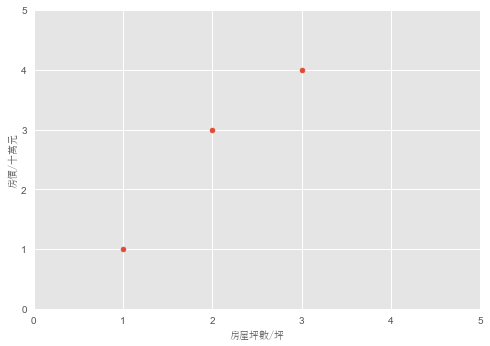

In [7]:
# imports
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# 亂數產生資料
np.random.seed(0)
x = [1, 2 ,3]
y = [1, 3, 4]
# y=ax+b Target function  a=3, b=15


# plot
plt.scatter(x,y,s=25)
plt.xticks(np.arange(0, 6, 1))
plt.yticks(np.arange(0, 6, 1))

plt.xlabel('房屋坪數/坪', fontproperties="SimSun")
plt.ylabel('房價/十萬元', fontproperties="SimSun")
plt.show()

In [2]:
x = np.array([[1.40280301e-01],[9.03857692e-01],[5.35815131e-01],[3.58391981e-01],[2.43418162e-02],[2.43342904e-02],[3.37370600e-03],[7.50261116e-01],[3.61339257e-01],[5.01366775e-01],[4.23721405e-04],[9.40725121e-01],[6.92960750e-01],[4.50878979e-02],[3.30603187e-02],[3.36372142e-02],[9.25633424e-02],[2.75369313e-01],[1.86576499e-01],[8.48144121e-02],[3.74363965e-01],[1.94585372e-02],[8.53484957e-02],[1.34221000e-01],[2.07999831e-01],[6.16501290e-01],[3.98696193e-02],[2.64437058e-01],[3.50955021e-01],[2.15764084e-03],[3.69110747e-01],[2.90784768e-02],[4.23170975e-03],[9.00383763e-01],[9.32445223e-01],[6.53506272e-01],[9.27895484e-02],[9.53984185e-03],[4.68174835e-01],[1.93734218e-01]])
y = np.array([ 5.82469676e+00,  7.94613194e+00,  9.24976070e+00,  6.59761731e+00,
        2.16651685e+00, -2.50365745e-03, -1.00182588e+00,  9.02075194e+00,
        8.57086436e+00,  8.50848958e+00, -7.34549241e-02,  8.73802779e+00,
        7.26038154e+00,  2.38778217e+00,  2.02397265e+00,  3.57417666e+00,
        5.15052189e+00,  5.57291682e+00,  6.83461431e+00,  4.20408429e+00,
        7.21499207e+00,  2.24057093e+00,  5.63575746e+00,  6.66180813e+00,
        5.91402744e+00,  8.29511673e+00,  3.18174801e+00,  8.23158707e+00,
        7.30330971e+00,  2.55480191e-02,  6.76197223e+00,  1.05656839e+00,
        1.21851645e+00,  1.03566236e+01,  8.95941549e+00,  9.67640393e+00,
        5.17463285e+00,  2.25781800e-01,  8.60137397e+00,  8.13359834e+00])

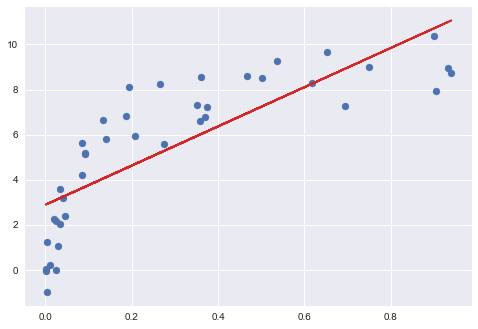

In [4]:
#簡單線性回歸
from sklearn.linear_model import LinearRegression
plt.style.use('seaborn')
model = LinearRegression()
model.fit(x,y)
yfit = model.predict(x)
plt.scatter(x,y)
plt.plot(x, yfit, color="#d62728")

#### 使用 Sklearn SGDRegressor
Sklearn 提供了 SGDRegressor 並實現了隨機梯度下降學習。
*   一般的梯度下降法是一次用全部訓練集的數據計算損失函數的梯度，然後做一次參數的更新修正。
*   隨機梯度下降法就是一次跑一個樣本或是小批次樣本，然後算出一次梯度並更新。而所謂的隨機就是在訓練過程中隨機地抽取樣本，所以才會稱為隨機梯度下降法。

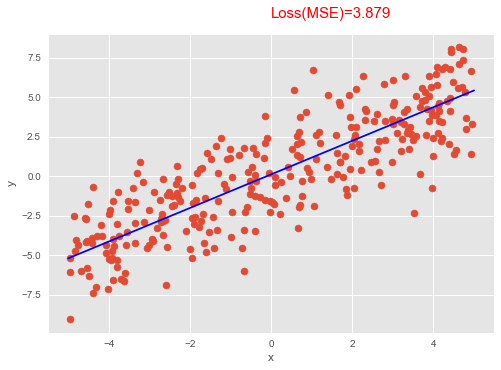

In [31]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import scipy.stats as ss

# 隨機產生一個特徵的X與輸出y
X = np.random.uniform(-5, 5, 300)
y = X + ss.norm.rvs(size = 300, loc = 0, scale = 2)
X = np.expand_dims(X, axis = 1)

# 建立 SGDRegressor 並設置超參數
regModel = SGDRegressor(max_iter=1000)
# 訓練模型
regModel.fit(X, y)
# 建立測試資料
x_test = np.linspace(-5, 5, 100)[:,None]
# 預測測試集
y_test=regModel.predict(x_test)
# 預測訓練集
y_pred=regModel.predict(X)
# 視覺化預測結果
plt.scatter(X,y)
plt.plot(x_test.ravel(),y_test, color="b")
plt.xlabel('x')
plt.ylabel('y')
plt.text(0, 10, 'Loss(MSE)=%.3f' % mean_squared_error(y_pred, y), fontdict={'size': 15, 'color':  'red'})
plt.show()